In [2]:
# Cell 1 - imports and load
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# paths
DATA_PATH = "../backend/data/products.csv"
OUT_DIR = "plots"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
df.head()


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,Modern Wooden Dining Table,FurniCraft,A sleek modern wooden dining table for family ...,15999,Furniture,https://example.com/images/dining_table.jpg,FurniCraft Industries,150x90x75 cm,India,Oak wood,Brown,UID0001
1,Ergonomic Office Chair,ErgoSeat,Comfortable adjustable office chair with lumba...,8999,Furniture,https://example.com/images/office_chair.jpg,ErgoSeat Ltd.,70x70x110 cm,India,Mesh/Metal,Black,UID0002
2,Minimalist Bookshelf,OakLine,Five-tier bookshelf made of solid oak wood wit...,7499,Furniture,https://example.com/images/bookshelf.jpg,OakLine Furnishings,80x30x180 cm,India,Oak wood,Natural,UID0003
3,LED Floor Lamp,GlowBright,"Stylish LED lamp with touch controls, adjustab...",3499,Lighting,https://example.com/images/floor_lamp.jpg,GlowBright Co.,40x40x160 cm,China,Metal/Plastic,White,UID0004
4,Queen Size Bed Frame,RestWell,Sturdy wooden bed frame with modern headboard ...,21999,Furniture,https://example.com/images/bed_frame.jpg,RestWell Pvt Ltd,210x160x110 cm,India,Plywood/Oak,Brown,UID0005


In [3]:
# Cell 2 - basic summary and cleaning
print("Products:", len(df))
print("Columns:", df.columns.tolist())

# Normalize price to numeric
if "price" in df.columns:
    df["price_numeric"] = pd.to_numeric(df["price"].astype(str).str.replace(r"[^\d\.]", "", regex=True), errors="coerce")
else:
    df["price_numeric"] = np.nan

df.describe(include='all')


Products: 15
Columns: ['title', 'brand', 'description', 'price', 'categories', 'images', 'manufacturer', 'package_dimensions', 'country_of_origin', 'material', 'color', 'uniq_id']


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id,price_numeric
count,15,15,15,15.000000,15,15,15,15,15,15,15,15,15.000000
unique,15,15,15,NaN,5,15,15,15,2,13,10,15,NaN
top,Modern Wooden Dining Table,FurniCraft,A sleek modern wooden dining table for family ...,NaN,Furniture,https://example.com/images/dining_table.jpg,FurniCraft Industries,150x90x75 cm,India,Oak wood,Brown,UID0001,NaN
freq,1,1,1,NaN,7,1,1,1,12,2,4,1,NaN
mean,NaN,NaN,NaN,9485.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9485.666667
std,NaN,NaN,NaN,10522.483864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10522.483864
min,NaN,NaN,NaN,799.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.000000
25%,NaN,NaN,NaN,1899.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899.000000
50%,NaN,NaN,NaN,4999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4999.000000
75%,NaN,NaN,NaN,12499.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12499.000000


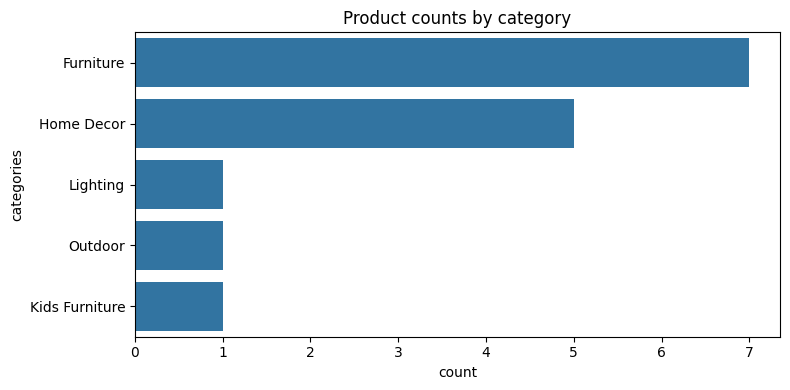

In [4]:
# Cell 3 - category distribution
cat_col = "categories" if "categories" in df.columns else ("category" if "category" in df.columns else None)
if cat_col:
    plt.figure(figsize=(8,4))
    sns.countplot(y=cat_col, data=df, order=df[cat_col].value_counts().index)
    plt.title("Product counts by category")
    plt.tight_layout()
    plt.savefig(f"{OUT_DIR}/category_counts.png", dpi=150)
    plt.show()
else:
    print("No category column")


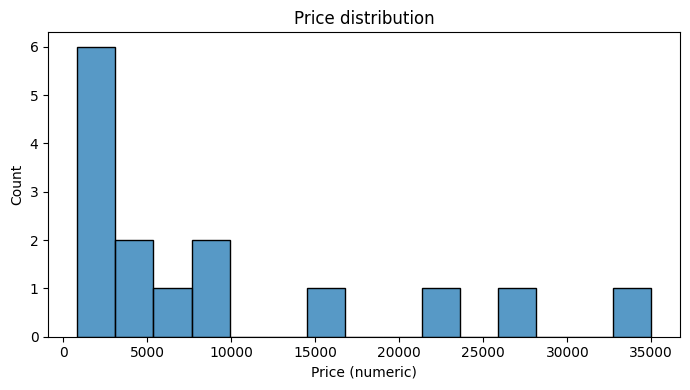

In [5]:
# Cell 4 - price distribution
plt.figure(figsize=(7,4))
sns.histplot(df["price_numeric"].dropna(), bins=15)
plt.title("Price distribution")
plt.xlabel("Price (numeric)")
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/price_distribution.png", dpi=150)
plt.show()


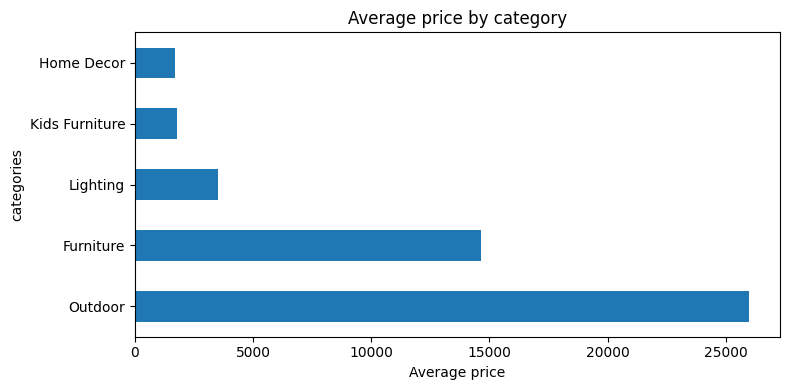

In [6]:
# Cell 5 - avg price per category
if cat_col:
    avg_price = df.groupby(cat_col)["price_numeric"].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    avg_price.plot(kind="barh")
    plt.title("Average price by category")
    plt.xlabel("Average price")
    plt.tight_layout()
    plt.savefig(f"{OUT_DIR}/avg_price_by_category.png", dpi=150)
    plt.show()
else:
    print("No category column")


c:\Users\HP\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]


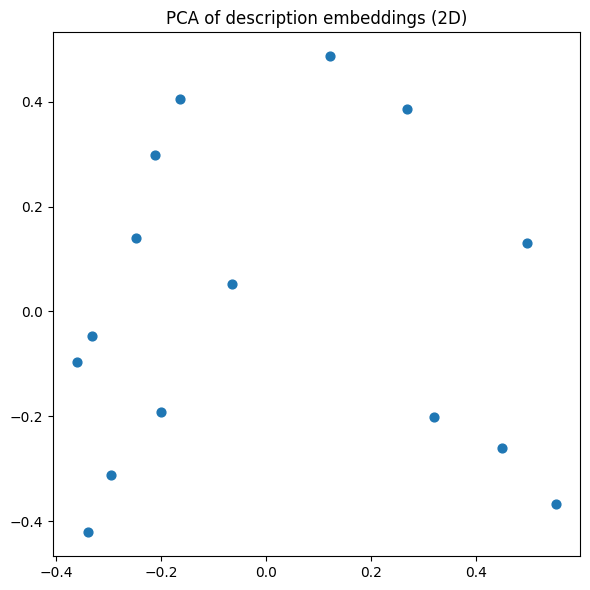

In [7]:
# Cell 6 - embeddings + PCA visualization
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

model = SentenceTransformer("all-MiniLM-L6-v2")
texts = df["description"].astype(str).tolist()
embs = model.encode(texts, show_progress_bar=True)
pca = PCA(n_components=2)
coords = pca.fit_transform(embs)

plt.figure(figsize=(6,6))
plt.scatter(coords[:,0], coords[:,1], s=40)
plt.title("PCA of description embeddings (2D)")
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/embeddings_pca.png", dpi=150)
plt.show()


In [8]:
# Cell 7 - save summary CSV
summary = {
    "num_products": len(df),
    "categories": df[cat_col].unique().tolist() if cat_col else []
}
pd.Series(summary).to_csv("../backend/analytics_summary.csv")
print("Saved analytics_summary.csv")


Saved analytics_summary.csv
